# Курс "Программирование на языке Python. Уровень 4. Анализ и визуализация данных на языке Python. Библиотеки numpy, pandas, matplotlib"

##  Библиотека pandas


In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np

In [3]:
from faker import Faker

## Объект DataFrame

DataFrame ("каркас для данных") - объект для представления табличных данных. Он состоит из упорядоченной коллекции столбцов, причем типы данных в разных столбцах могут различаться. Он содержит два индекса: по строкам и по столбцам. Можно сказать, что DataFrame - это словарь объектов Series, имеющий общий индекс.


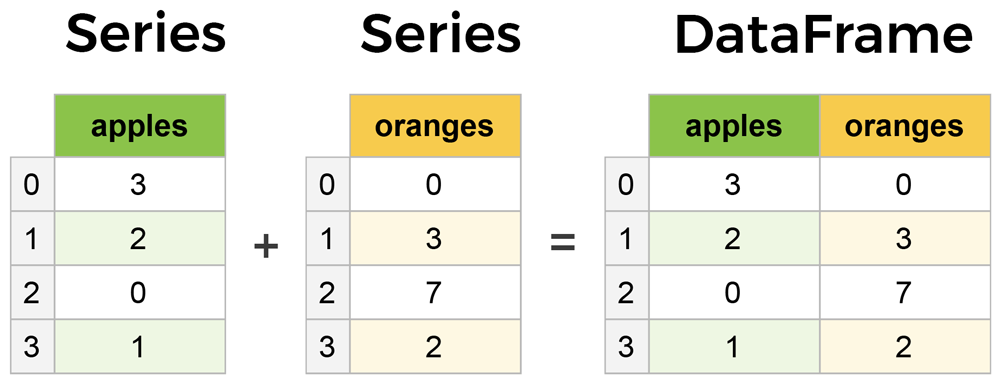


В этом блоке мы рассмотрим базовые CRUD-операции с DataFrame: 
 - добавление новых строк/столбцов
 - удаление строк/столбцов
 - доступ к столбцам и строкам.  


Перед тем, как приступить к знакомству с DataFrame, определим ряд терминов:
- "запись", "строка" - горизонтальный элемент DataFrame
- "поле", "признак", "столбец", "колонка" - вертикальный элемент DataFrame

Простой DataFrame можно создать из словаря:

In [30]:
data = { 'apples': [3, 2, 0, 1], 
         'oranges': [0, 3, 7, 2] }
purchases = pd.DataFrame(data)
purchases

apples  oranges
0       3        0
1       2        3
2       0        7
3       1        2

In [9]:
# Внешние ключи - это колонки, внутренние - индексы
df = pd.DataFrame(
    {
     'column_A': {'index_line1': 4, 'index_line2': 6},
     'column_B': {'index_line1': 7, 'index_line2': 9}
    }
)
df

column_A  column_B
index_line1         4         7
index_line2         6         9

In [10]:
# Создаем датафрейм с помощью faker
fake = Faker('ru_RU')
data2 = fake.simple_profile()
data2

{'username': 'bogdanovalora',
 'name': 'Абрамов Максим Ефимьевич',
 'sex': 'M',
 'address': 'д. Петухово, ш. Титова, д. 407 стр. 686, 294030',
 'mail': 'feliks2016@hotmail.com',
 'birthdate': datetime.date(1952, 7, 19)}

In [11]:
lst_data = [fake.simple_profile() for _ in range(5)]; lst_data

[{'username': 'fokinfeoktist',
  'name': 'Крылов Юлиан Артёмович',
  'sex': 'M',
  'address': 'г. Териберка, бул. Тимирязева, д. 986 стр. 1, 029713',
  'mail': 'kudrjavtsevserafim@yandex.ru',
  'birthdate': datetime.date(1974, 12, 16)},
 {'username': 'dementevamargarita',
  'name': 'Куликова Элеонора Геннадьевна',
  'sex': 'F',
  'address': 'ст. Иркутск, пер. Зеленый, д. 1/1 стр. 32, 622469',
  'mail': 'avksenti1993@mail.ru',
  'birthdate': datetime.date(1933, 6, 15)},
 {'username': 'jakovlevaevdokija',
  'name': 'Данилова Пелагея Макаровна',
  'sex': 'F',
  'address': 'с. Солнечногорск, алл. 9 Января, д. 137, 289490',
  'mail': 'danilavolkov@yandex.ru',
  'birthdate': datetime.date(1997, 1, 13)},
 {'username': 'fedor_27',
  'name': 'Мефодий Виленович Комиссаров',
  'sex': 'M',
  'address': 'п. Ахтубинск, ш. Смоленское, д. 2/4 к. 43, 468389',
  'mail': 'andronik1981@hotmail.com',
  'birthdate': datetime.date(1966, 10, 29)},
 {'username': 'zoja_69',
  'name': 'Денисова Жанна Ждановна',


In [12]:
# Чтобы ключи стали именами столбцов, нужно положить словари в список
df_data = pd.DataFrame(lst_data)
df_data

username                           name sex  \
0       fokinfeoktist         Крылов Юлиан Артёмович   M   
1  dementevamargarita  Куликова Элеонора Геннадьевна   F   
2   jakovlevaevdokija     Данилова Пелагея Макаровна   F   
3            fedor_27   Мефодий Виленович Комиссаров   M   
4             zoja_69        Денисова Жанна Ждановна   F   

                                             address  \
0  г. Териберка, бул. Тимирязева, д. 986 стр. 1, ...   
1  ст. Иркутск, пер. Зеленый, д. 1/1 стр. 32, 622469   
2    с. Солнечногорск, алл. 9 Января, д. 137, 289490   
3  п. Ахтубинск, ш. Смоленское, д. 2/4 к. 43, 468389   
4          ст. Карталы, пр. Троицкий, д. 2/4, 812569   

                           mail   birthdate  
0  kudrjavtsevserafim@yandex.ru  1974-12-16  
1          avksenti1993@mail.ru  1933-06-15  
2        danilavolkov@yandex.ru  1997-01-13  
3      andronik1981@hotmail.com  1966-10-29  
4             ydorofeev@mail.ru  1916-12-19

In [18]:
data2
# Series -> DataFrame 
s = pd.Series(data2)
s.name = 'Profile'
# Series -> DataFrame
s.to_frame()

{'username': 'bogdanovalora',
 'name': 'Абрамов Максим Ефимьевич',
 'sex': 'M',
 'address': 'д. Петухово, ш. Титова, д. 407 стр. 686, 294030',
 'mail': 'feliks2016@hotmail.com',
 'birthdate': datetime.date(1952, 7, 19)}

Profile
username                                     bogdanovalora
name                              Абрамов Максим Ефимьевич
sex                                                      M
address    д. Петухово, ш. Титова, д. 407 стр. 686, 294030
mail                                feliks2016@hotmail.com
birthdate                                       1952-07-19

In [23]:
data2
pd.DataFrame.from_dict(data2, orient='index')

{'username': 'bogdanovalora',
 'name': 'Абрамов Максим Ефимьевич',
 'sex': 'M',
 'address': 'д. Петухово, ш. Титова, д. 407 стр. 686, 294030',
 'mail': 'feliks2016@hotmail.com',
 'birthdate': datetime.date(1952, 7, 19)}

0
username                                     bogdanovalora
name                              Абрамов Максим Ефимьевич
sex                                                      M
address    д. Петухово, ш. Титова, д. 407 стр. 686, 294030
mail                                feliks2016@hotmail.com
birthdate                                       1952-07-19

In [26]:
# ключи -> колонки, обязательно в список, даже если один словарь!
pd.DataFrame([data2])

username                      name sex  \
0  bogdanovalora  Абрамов Максим Ефимьевич   M   

                                           address                    mail  \
0  д. Петухово, ш. Титова, д. 407 стр. 686, 294030  feliks2016@hotmail.com   

    birthdate  
0  1952-07-19

Можно при создании сразу указать индекс (он указывается в этом случае отдельно), а можно и потом:

In [31]:
purchases
names = ['Carl', 'Julia', 'Alex', 'Leela']
purchases.index = names
purchases

apples  oranges
0       3        0
1       2        3
2       0        7
3       1        2

apples  oranges
Carl        3        0
Julia       2        3
Alex        0        7
Leela       1        2

In [33]:
data
# Не забываем о размерности
purchases = pd.DataFrame(data, index=names)
purchases

{'apples': [3, 2, 0, 1], 'oranges': [0, 3, 7, 2]}

apples  oranges
Carl        3        0
Julia       2        3
Alex        0        7
Leela       1        2

In [36]:
type(purchases), type(purchases['apples'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [37]:
purchases.info()  # Сводная информация о колонках и их типах

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Carl to Leela
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   apples   4 non-null      int64
 1   oranges  4 non-null      int64
dtypes: int64(2)
memory usage: 96.0+ bytes


In [38]:
# Первые N строк(по умолчанию 5). В данном случае 3
purchases.head(3)  

apples  oranges
Carl        3        0
Julia       2        3
Alex        0        7

In [39]:
# Последние N строк(по умолчанию 5). В данном случае 2
purchases.tail(2) 

apples  oranges
Alex        0        7
Leela       1        2

In [40]:
# Сводная описательная статистика по колонкам
purchases.describe() 

apples  oranges
count  4.000000  4.00000
mean   1.500000  3.00000
std    1.290994  2.94392
min    0.000000  0.00000
25%    0.750000  1.50000
50%    1.500000  2.50000
75%    2.250000  4.00000
max    3.000000  7.00000

In [41]:
purchases.dtypes

apples     int64
oranges    int64
dtype: object

In [47]:
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [51]:
# Используем свойство(атрибут) DataFrame.empty
# print(bool(df))  # Error
purchases.empty, df.empty

(False, True)

In [52]:
purchases.shape, purchases.ndim, purchases.size

((4, 2), 2, 8)

In [53]:
purchases

apples  oranges
Carl        3        0
Julia       2        3
Alex        0        7
Leela       1        2

In [54]:
# Только значения без индекса. Результат - двумерный numpy массив
purchases.values

array([[3, 0],
       [2, 3],
       [0, 7],
       [1, 2]], dtype=int64)

In [55]:
type(purchases.values)

numpy.ndarray

In [60]:
# Используем буфер обмена
df = pd.read_clipboard(decimal=',')
df

one   two  three
0    4  25.3    4.0
1    5   4.0    2.0
2    7  87.0    9.2
3   12  31.0   11.0

In [61]:
df.dtypes

one        int64
two      float64
three    float64
dtype: object

### Работа с excel файлами

In [65]:
import os
# Текущая папка
path = os.getcwd() 
path

'C:\\Users\\Administrator\\Documents\\Python4_01102023\\Day_4'

In [69]:
pd.read_excel?

Нужно добавить библиотеку `openpyxl`:
```
conda install openpyxl --yes
```

In [66]:
df21 = pd.read_excel(
    os.path.join(path, 'data/zeroth.xlsx'), usecols='A,C'
)
df21

Unnamed: 0  Column_Two
0           0           5
1           1           6
2           2           7

In [67]:
# Считать файл
df11 = pd.read_excel(
    'data/first.xlsx', sheet_name='Лист1', skiprows=1
)
df11

Count   A     B    C
0      1  45   2.1    5
1      2  21   3.0    6
2      3  34   4.0    8
3      4   7   5.0   11
4      5   8   6.0  223
5      6  34   7.0   34
6      7  12   8.0   45
7      8  56   9.0   45
8      9  90  11.0   56

In [68]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   9 non-null      int64  
 1   A       9 non-null      int64  
 2   B       9 non-null      float64
 3   C       9 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 416.0 bytes


In [70]:
# Считать файл
df10 = pd.read_excel('data/first.xlsx', header=[0, 1])
df10

Test               
  Count   A     B    C
0     1  45   2.1    5
1     2  21   3.0    6
2     3  34   4.0    8
3     4   7   5.0   11
4     5   8   6.0  223
5     6  34   7.0   34
6     7  12   8.0   45
7     8  56   9.0   45
8     9  90  11.0   56

In [71]:
# Выводим значение свойства .columns
df10.columns

MultiIndex([('Test', 'Count'),
            ('Test',     'A'),
            ('Test',     'B'),
            ('Test',     'C')],
           )

In [72]:
# Заменяем имена колонок
df10.columns = ['Count', 'Ivanov', 'Petrov', 'Nikolaev']
df10

Count  Ivanov  Petrov  Nikolaev
0      1      45     2.1         5
1      2      21     3.0         6
2      3      34     4.0         8
3      4       7     5.0        11
4      5       8     6.0       223
5      6      34     7.0        34
6      7      12     8.0        45
7      8      56     9.0        45
8      9      90    11.0        56

In [74]:
# Считать файл
df1 = pd.read_excel(
    'data/first.xlsx', 
    # Сразу задаем имена для колонок.
    names=['Count', 'Ivanov', 'Petrov', 'Nikolaev']
)
df1

Count Ivanov Petrov Nikolaev
0  Count      A      B        C
1      1     45    2.1        5
2      2     21      3        6
3      3     34      4        8
4      4      7      5       11
5      5      8      6      223
6      6     34      7       34
7      7     12      8       45
8      8     56      9       45
9      9     90     11       56

In [75]:
# Считать файл
df12 = pd.read_excel('data/first.xlsx', skiprows=1)
df12['A'] = df12['A'].astype(np.float64)
df12

Count     A     B    C
0      1  45.0   2.1    5
1      2  21.0   3.0    6
2      3  34.0   4.0    8
3      4   7.0   5.0   11
4      5   8.0   6.0  223
5      6  34.0   7.0   34
6      7  12.0   8.0   45
7      8  56.0   9.0   45
8      9  90.0  11.0   56

In [76]:
df12.columns = ['Count', 'Ivanov', 'Petrov', 'Nikolaev']
df12

Count  Ivanov  Petrov  Nikolaev
0      1    45.0     2.1         5
1      2    21.0     3.0         6
2      3    34.0     4.0         8
3      4     7.0     5.0        11
4      5     8.0     6.0       223
5      6    34.0     7.0        34
6      7    12.0     8.0        45
7      8    56.0     9.0        45
8      9    90.0    11.0        56

In [77]:
df12.dtypes

Count         int64
Ivanov      float64
Petrov      float64
Nikolaev      int64
dtype: object

In [78]:
df12.astype(np.float64)

Count  Ivanov  Petrov  Nikolaev
0    1.0    45.0     2.1       5.0
1    2.0    21.0     3.0       6.0
2    3.0    34.0     4.0       8.0
3    4.0     7.0     5.0      11.0
4    5.0     8.0     6.0     223.0
5    6.0    34.0     7.0      34.0
6    7.0    12.0     8.0      45.0
7    8.0    56.0     9.0      45.0
8    9.0    90.0    11.0      56.0

In [79]:
df1

Count Ivanov Petrov Nikolaev
0  Count      A      B        C
1      1     45    2.1        5
2      2     21      3        6
3      3     34      4        8
4      4      7      5       11
5      5      8      6      223
6      6     34      7       34
7      7     12      8       45
8      8     56      9       45
9      9     90     11       56

In [80]:
df1.to_csv('data/outfile.csv', sep=';')

In [81]:
df12

Count  Ivanov  Petrov  Nikolaev
0      1    45.0     2.1         5
1      2    21.0     3.0         6
2      3    34.0     4.0         8
3      4     7.0     5.0        11
4      5     8.0     6.0       223
5      6    34.0     7.0        34
6      7    12.0     8.0        45
7      8    56.0     9.0        45
8      9    90.0    11.0        56

In [82]:
# Сохранить датафрейм в файл xlsx
# https://pandas.pydata.org/pandas-docs/version/1.5.0/reference/api/pandas.ExcelWriter.html
writer = pd.ExcelWriter('data/out_two_zero.xlsx')
df12.to_excel(writer, float_format="%.2f")
writer.close()


In [83]:
# Сохранить датафрейм в файл xlsx
writer = pd.ExcelWriter('data/out_excel_wSheet.xlsx')
# Явно задаем название для листа
df.to_excel(writer, "SheetOne")
writer.close()

In [84]:
df2 = pd.read_excel('data/second.xlsx', header=[1])
df2

first  second  third
0     45       2      5
1     21       3      6
2     34       4      8
3      7       5     11
4      8       6    223
5     34       7     34
6     12       8     45
7     56       9     45
8     90      11     56

In [85]:
df2.columns

Index(['first', 'second', 'third'], dtype='object')

#### Информация по листам(sheet_names) файла xlsx
https://stackoverflow.com/questions/17977540/pandas-looking-up-the-list-of-sheets-in-an-excel-file

In [86]:
xl = pd.ExcelFile('data/first.xlsx')

In [87]:
xl.sheet_names

['Лист1', 'Лист2']

In [88]:
xl.parse('Лист1')

Test Unnamed: 1 Unnamed: 2 Unnamed: 3
0  Count          A          B          C
1      1         45        2.1          5
2      2         21          3          6
3      3         34          4          8
4      4          7          5         11
5      5          8          6        223
6      6         34          7         34
7      7         12          8         45
8      8         56          9         45
9      9         90         11         56

#### Вариант 2

In [89]:
from openpyxl import load_workbook

def get_sheetnames_xlsx(filepath):
    wb = load_workbook(filepath, read_only=True, keep_links=False)
    return wb.sheetnames

In [90]:
get_sheetnames_xlsx('data/first.xlsx')

['Лист1', 'Лист2']

Ссылки на библиотеки(работа с Excel)  
https://www.python-excel.org/


https://openpyxl.readthedocs.io/en/stable/  
https://www.pyxll.com/  
https://www.xlwings.org/  
https://github.com/jmcnamara/XlsxWriter

"Python for Excel" Felix Zumstein  
https://www.xlwings.org/book

